**Logistic Regression**

Importing libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading dataset

In [161]:
df = pd.read_csv("/content/ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


Data Visualization

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'address'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'ed'}>],
       [<Axes: title={'center': 'employ'}>,
        <Axes: title={'center': 'equip'}>,
        <Axes: title={'center': 'callcard'}>,
        <Axes: title={'center': 'wireless'}>,
        <Axes: title={'center': 'longmon'}>],
       [<Axes: title={'center': 'tollmon'}>,
        <Axes: title={'center': 'equipmon'}>,
        <Axes: title={'center': 'cardmon'}>,
        <Axes: title={'center': 'wiremon'}>,
        <Axes: title={'center': 'longten'}>],
       [<Axes: title={'center': 'tollten'}>,
        <Axes: title={'center': 'cardten'}>,
        <Axes: title={'center': 'voice'}>,
        <Axes: title={'center': 'pager'}>,
        <Axes: title={'center': 'internet'}>],
       [<Axes: title={'center': 'callwait'}>,
        <Axes: title={'center': 'confer'}>,
        <Axes: title

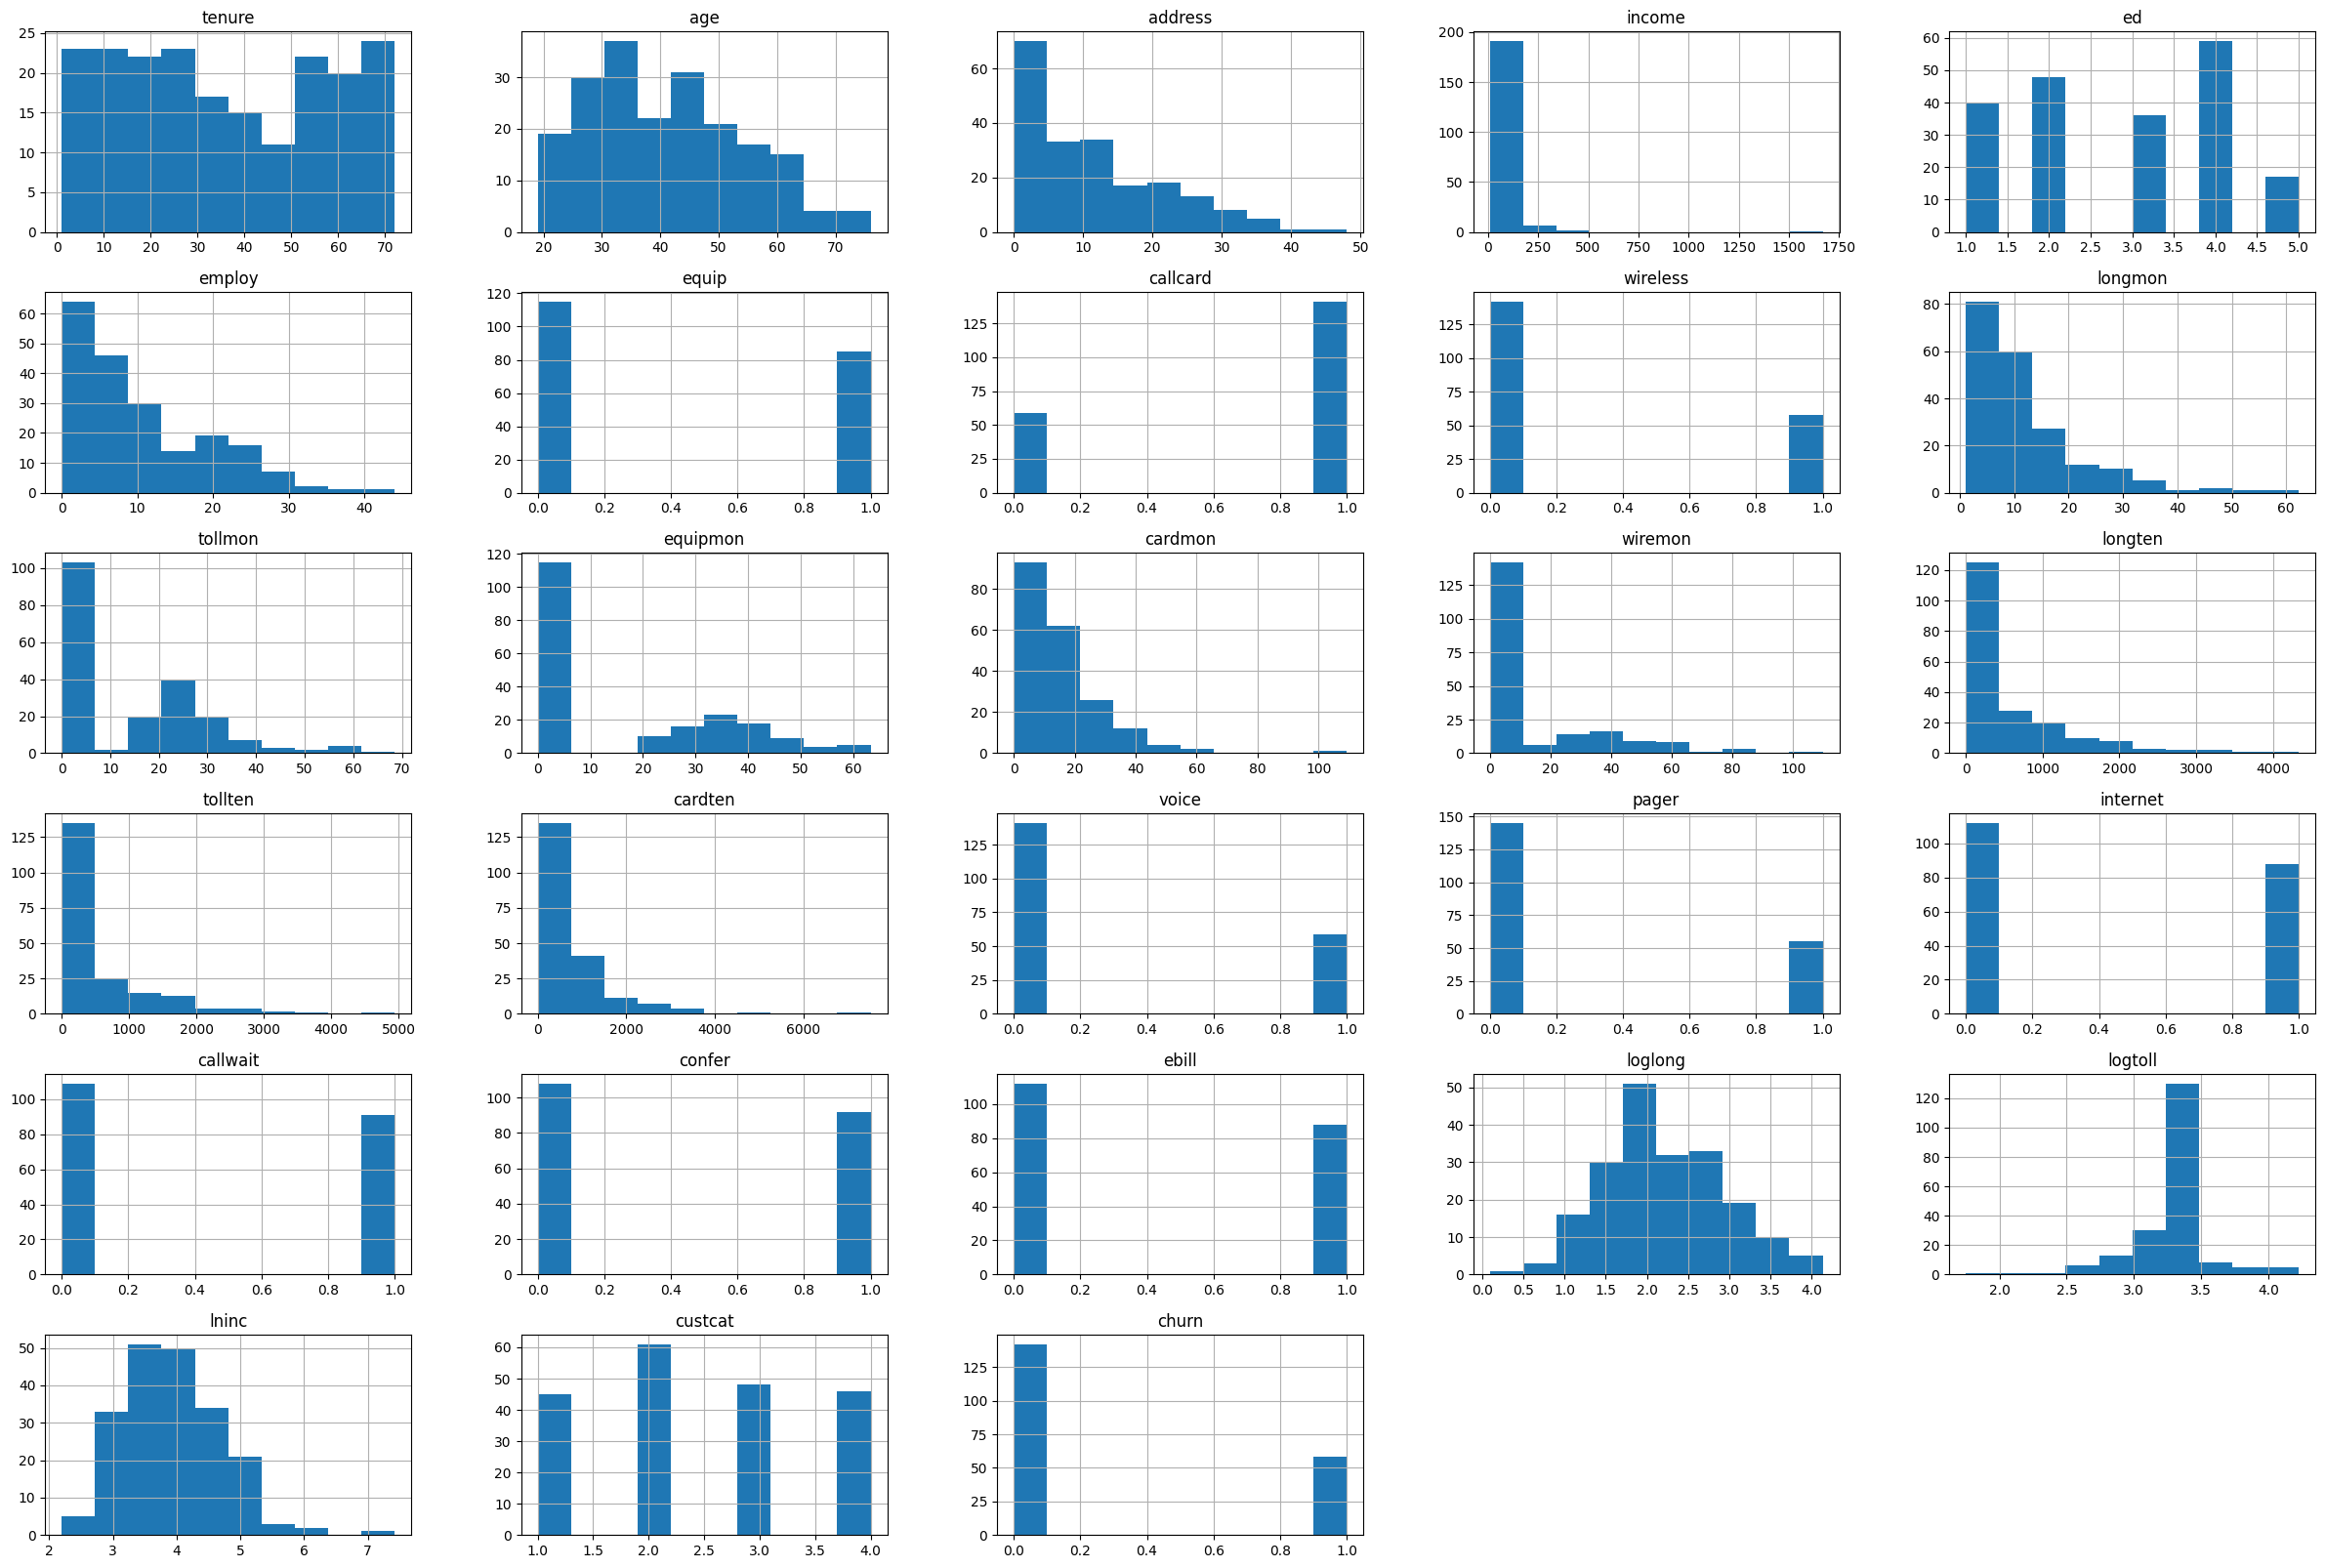

In [167]:
df.hist(figsize=(30, 20))

Step 1: Data Preprocessing


In [168]:
df['churn'].value_counts()

,count
churn,
0.0,142
1.0,58


Feature and Target Selection

In [170]:
X = df.drop('churn', axis=1).values
y = df['churn'].values

Normalization

In [172]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

Step 2: Train/test split

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Algorithm Setup

Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

Step 4: Model Predict

In [181]:
y_pred = model4.predict(X_test)

Step 6: Evaluation

In [184]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Logistic Regresson Accuracy: {accuracy}")
print(f"\nClassification Report:\n {classification_report(y_test, y_pred)}")
print(f"\nConfusion Matrix:\n {confusion_matrix(y_test, y_pred)}")

Logistic Regresson Accuracy: 77.5

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        31
         1.0       0.50      0.67      0.57         9

    accuracy                           0.78        40
   macro avg       0.70      0.74      0.71        40
weighted avg       0.80      0.78      0.79        40


Confusion Matrix:
 [[25  6]
 [ 3  6]]
